In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
# !nvidia-smi

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

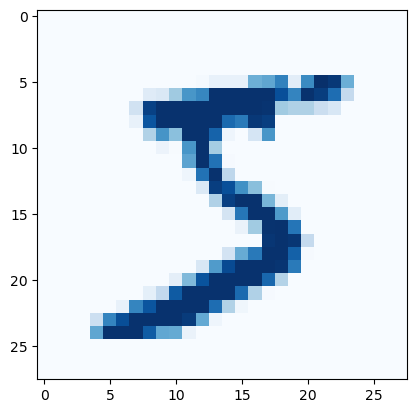

In [11]:
plt.imshow(x_train[0], cmap = 'Blues')

In [12]:
y_train.shape

(60000,)

In [13]:
class_names = [0,1,2,3,4,5,6,7,8,9]
class_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
x_train.min(), x_train.max()

(0, 255)

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(x_train, y_train, epochs = 10,
          validation_data = (x_test,y_test),
          callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6938 - accuracy: 0.7973 - val_loss: 0.2906 - val_accuracy: 0.9094 - lr: 1.0000e-04
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2341 - accuracy: 0.9291 - val_loss: 0.2033 - val_accuracy: 0.9415 - lr: 1.1220e-04
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1623 - accuracy: 0.9504 - val_loss: 0.1595 - val_accuracy: 0.9545 - lr: 1.2589e-04
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1285 - accuracy: 0.9603 - val_loss: 0.1571 - val_accuracy: 0.9536 - lr: 1.4125e-04
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9670 - val_loss: 0.1476 - val_accuracy: 0.9574 - lr: 1.5849e-04
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0955 - accuracy: 0.9706 - val_loss: 0.1603 - val_accuracy: 0.9567 - lr: 1.7783e-04
Epoch 7/10
1875/1875 [===========

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9668


[0.11965934932231903, 0.9667999744415283]

<AxesSubplot:>

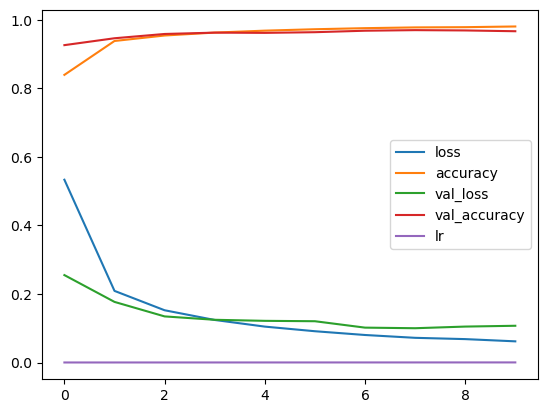

In [18]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Finding the ideal learning rate')

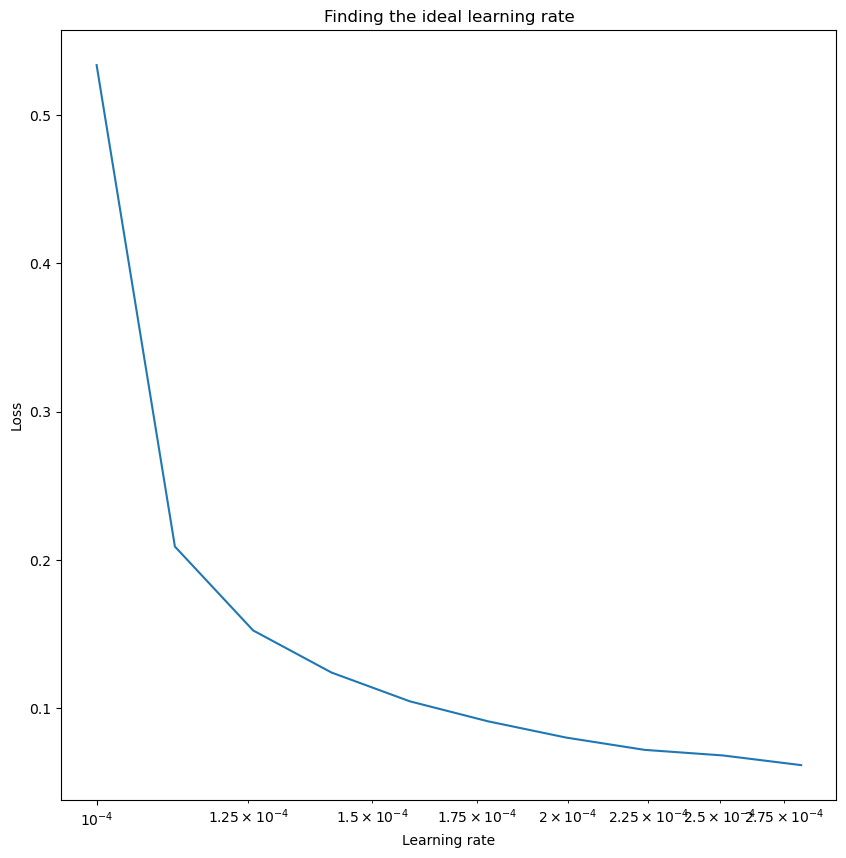

In [19]:
plt.figure(figsize = (10,10))
lrs = 1e-4*(10**(np.arange(10)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [18]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005),
              metrics = ['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs = 10,
          validation_data = (x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0642 - accuracy: 0.7107 - val_loss: 0.4178 - val_accuracy: 0.8730
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3287 - accuracy: 0.8988 - val_loss: 0.2672 - val_accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2211 - accuracy: 0.9334 - val_loss: 0.2096 - val_accuracy: 0.9354
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1704 - accuracy: 0.9481 - val_loss: 0.1874 - val_accuracy: 0.9423
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1346 - accuracy: 0.9590 - val_loss: 0.1939 - val_accuracy: 0.9426
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1118 - accuracy: 0.9667 - val_loss: 0.1595 - val_accuracy: 0.9527
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0918 - accuracy: 0.9715 - val_loss: 0.1593 - val_accurac

In [19]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9595


[0.1454915702342987, 0.9595000147819519]

In [20]:
y_prob = model_2.predict(x_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[2.2872708e-05, 3.0023773e-05, 2.2089730e-06, ..., 9.9973661e-01,
        3.9683611e-05, 1.3168323e-04],
       [1.1897203e-09, 2.5120701e-07, 9.9999952e-01, ..., 7.6387714e-08,
        5.8049974e-09, 1.9672459e-09],
       [1.5367962e-07, 9.8938096e-01, 3.3620985e-05, ..., 5.7611372e-03,
        3.3323656e-04, 2.7951371e-04],
       ...,
       [1.9618870e-14, 1.4217654e-09, 2.4860636e-10, ..., 3.8752925e-09,
        1.0863571e-12, 8.8563645e-09],
       [5.5889093e-10, 2.8413033e-10, 2.9607891e-10, ..., 2.9970658e-11,
        1.2655877e-06, 1.4257686e-09],
       [4.4613374e-16, 1.8289736e-17, 6.8373353e-14, ..., 6.1230199e-19,
        3.2075481e-14, 1.3046675e-17]], dtype=float32)

In [21]:
y_prob[0].argmax()

7

In [22]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
y_pred[1]

2

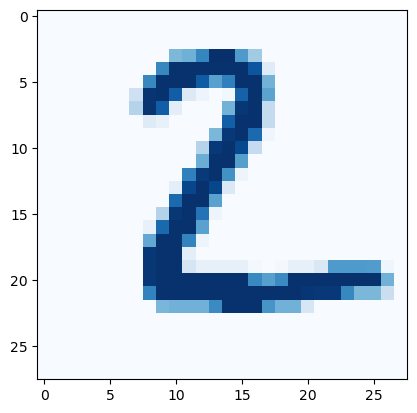

In [24]:
plt.imshow(x_test[1], cmap = 'Blues')

In [25]:
def probability(x):
  return np.round(y_prob[x].max()*100,2)

def actual(x):
  return class_names[y_test[x]]

def prediction(x):
  return class_names[y_pred[x]]

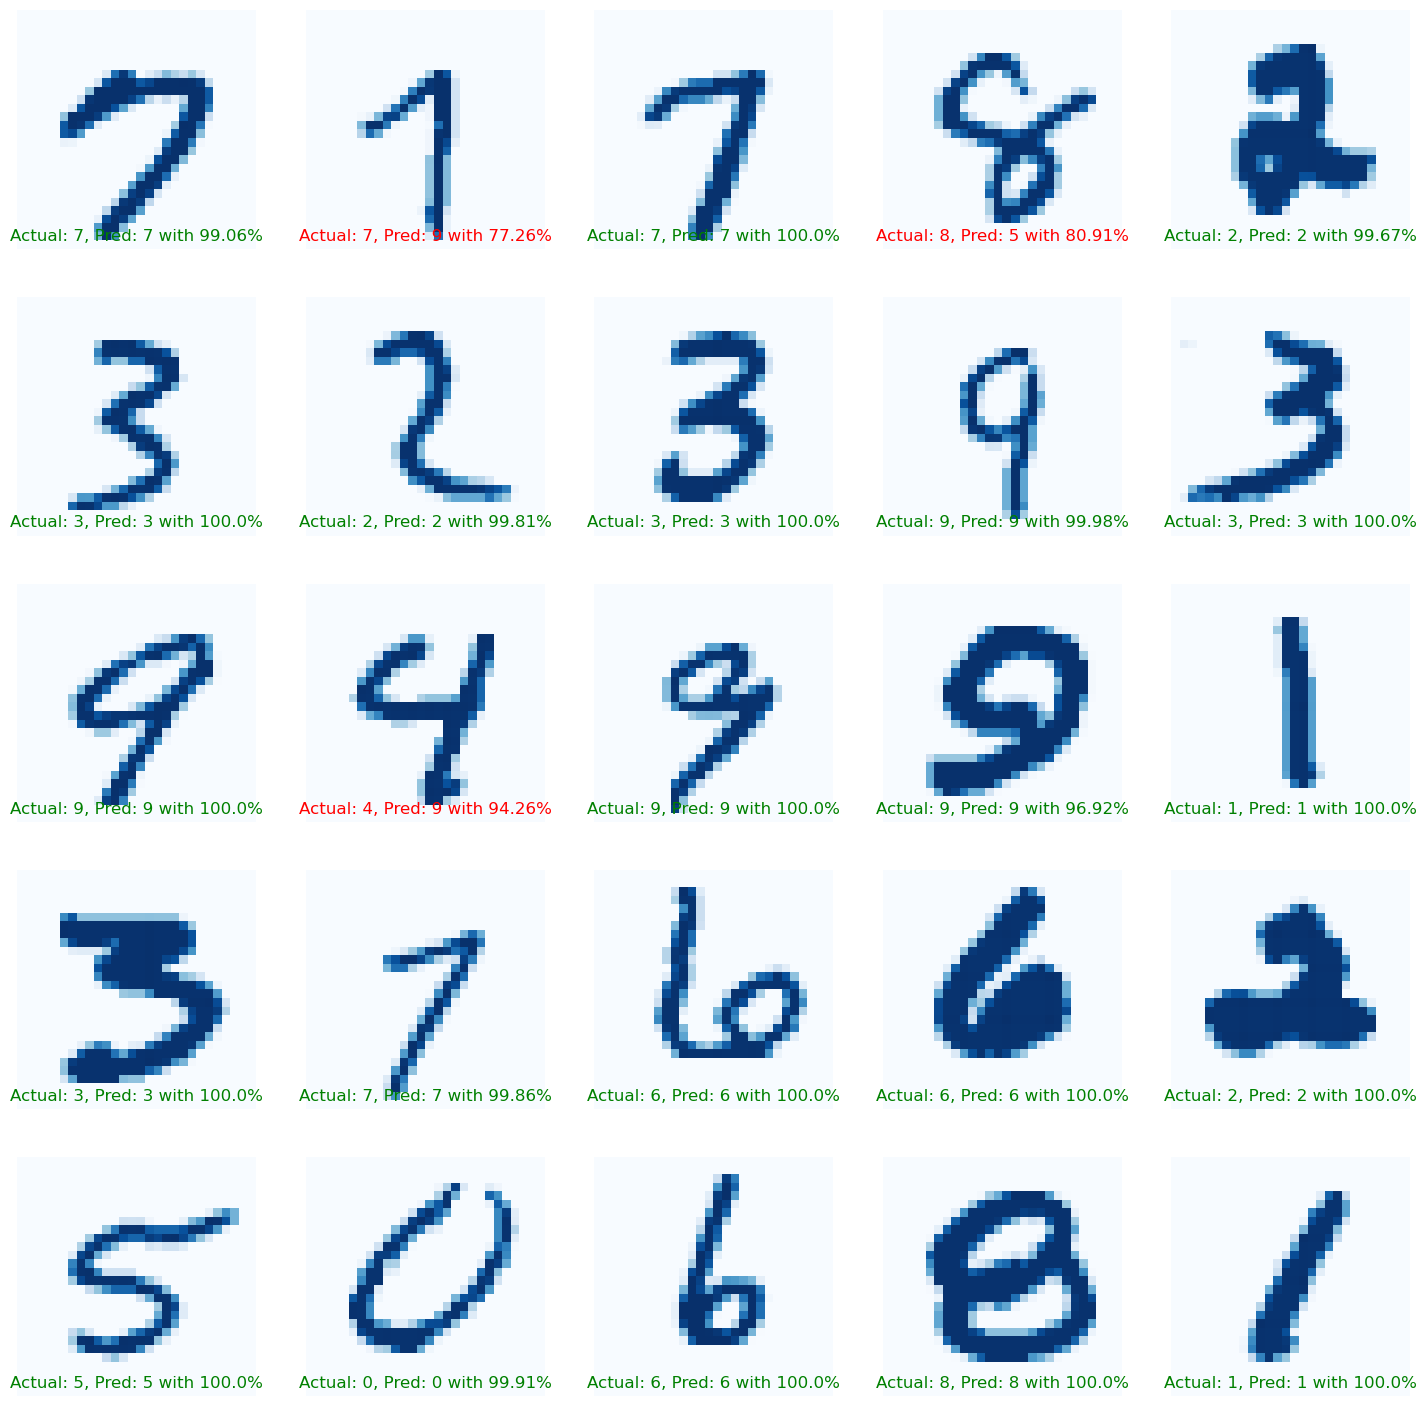

In [27]:
plt.figure(figsize = (18,18))

for i in range (25):
  plt.subplot(5,5,i+1)
  rand_num = np.random.randint(0,len(x_test)-1)
  plt.imshow(x_test[rand_num], cmap = 'Blues')
  plt.title(f'Actual: {actual(rand_num)}, Pred: {prediction(rand_num)} with {probability(rand_num)}%',y = 0, color = 'green' if actual(rand_num) == prediction(rand_num) else 'red')
  plt.axis(False)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
cm = confusion_matrix(y_true = y_test,
                      y_pred = y_pred)
cm

array([[ 959,    0,    1,    4,    0,    2,   12,    0,    1,    1],
       [   1, 1119,    1,    3,    0,    2,    2,    3,    3,    1],
       [   6,    2,  972,   29,    1,    2,    7,    7,    6,    0],
       [   0,    0,    4,  981,    2,    9,    0,    4,    8,    2],
       [   1,    0,    5,    0,  929,    2,    9,    2,    3,   31],
       [   1,    0,    1,   14,    0,  855,   11,    1,    6,    3],
       [   3,    3,    1,    0,    4,    9,  936,    1,    1,    0],
       [   2,    6,   13,    6,    0,    1,    0,  976,    4,   20],
       [   5,    0,    2,   24,    2,   12,    9,    4,  907,    9],
       [   3,    1,    0,   14,   14,    3,    0,    7,    6,  961]],
      dtype=int64)

<Figure size 1000x1000 with 0 Axes>

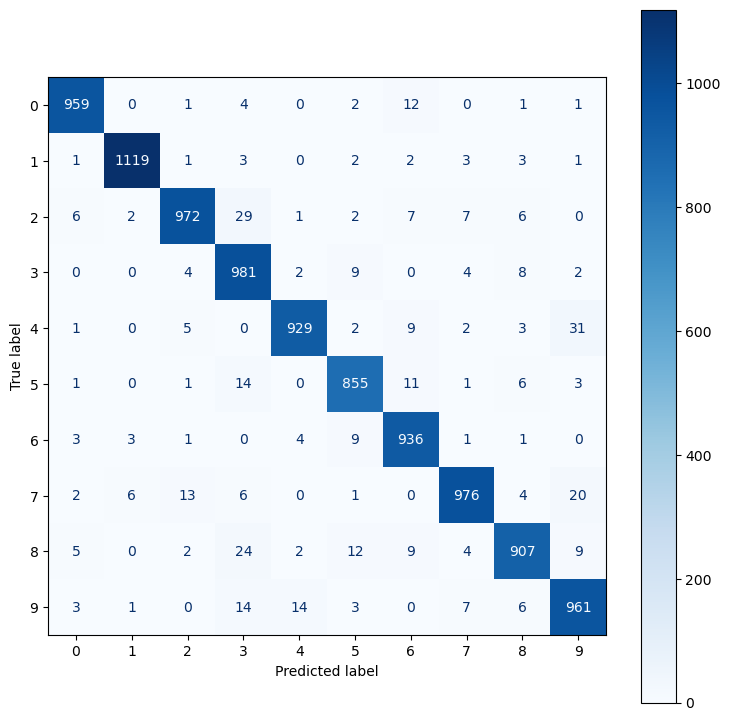

In [30]:
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues',ax=ax)

In [31]:
model_2.layers

In [ ]:
# Check the weights of the first hidden layer

weights, biases = model_2.layers[1].get_weights()
weights